In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
race = pd.read_csv("../data/race.csv")
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    1207 non-null   int64  
 1   event           1207 non-null   object 
 2   race            1207 non-null   object 
 3   city            1035 non-null   object 
 4   country         1203 non-null   object 
 5   date            1207 non-null   object 
 6   start_time      1207 non-null   object 
 7   participation   1207 non-null   object 
 8   distance        1207 non-null   float64
 9   elevation_gain  1207 non-null   int64  
 10  elevation_loss  1207 non-null   int64  
 11  aid_stations    1207 non-null   int64  
 12  participants    1207 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 122.7+ KB


In [4]:
runners = pd.read_csv("../data/ultra_rankings.csv")
runners = runners.rename(columns={"rank": "ranking"})
runners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137803 entries, 0 to 137802
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   race_year_id     137803 non-null  int64  
 1   ranking          120012 non-null  float64
 2   runner           137803 non-null  object 
 3   time             120012 non-null  object 
 4   age              137803 non-null  int64  
 5   gender           137773 non-null  object 
 6   nationality      137803 non-null  object 
 7   time_in_seconds  120012 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 8.4+ MB


# Test on races with distance = 0

What explains race.distance = 0 and what impact on the rest ?

In [5]:
race_dist_0 = race[race.distance == 0]
race_dist_0

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants
48,64771,The Old Forest Hanmer 100,100mile,HanmerSprings,New Zealand,2021-05-14,10:00:00,solo,0.0,0,0,16,0
72,71220,Run Lovit,100M,NaN,United States,2021-02-26,00:00:00,solo,0.0,0,0,0,0
122,67160,IDAHO MOUNTAIN TRAIL ULTRA FESTIVAL,100 Mile,NaN,United States,2020-09-12,00:00:00,solo,0.0,0,0,0,0
123,67713,Pine creek challenge,100Miles,Wellsboro,"PA, United States",2020-09-12,00:00:00,solo,0.0,0,0,0,0
141,51777,Chiemgauer 100,100 Mile,Bergen,Germany,2020-07-31,13:00:00,Solo,0.0,0,0,9,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,7113,LEADVILLE TRAIL 100 RUN,100 MILE TRAIL RUN,Leadville,United States,2014-08-16,00:00:00,solo,0.0,0,0,0,0
1023,12085,Cruel Jewel,Cruel Jewel 100,Blairsville,United States,2014-05-16,00:00:00,solo,0.0,0,0,11,125
1085,4294,Leadville Trail 100 Run,100 MILE TRAIL RUN,Leadville,United States,2013-08-17,00:00:00,solo,0.0,0,0,0,0
1145,3689,IDAHO MOUNTAIN TRAIL ULTRA FESTIVAL,100 Mile,NaN,United States,2012-10-06,00:00:00,solo,0.0,0,0,0,0


In [6]:
race_dist_0 = race_dist_0[race_dist_0.elevation_loss == 0]
race_dist_0 = race_dist_0[race_dist_0.elevation_gain == 0]
race_dist_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 48 to 1162
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    74 non-null     int64  
 1   event           74 non-null     object 
 2   race            74 non-null     object 
 3   city            51 non-null     object 
 4   country         74 non-null     object 
 5   date            74 non-null     object 
 6   start_time      74 non-null     object 
 7   participation   74 non-null     object 
 8   distance        74 non-null     float64
 9   elevation_gain  74 non-null     int64  
 10  elevation_loss  74 non-null     int64  
 11  aid_stations    74 non-null     int64  
 12  participants    74 non-null     int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 8.1+ KB


Dès lors qu'une course a sa distance à 0, elle a également son dénivelé positif et négatif à 0. Il y a donc eu une saisie non faite relative aux métriques de la course. <br>

**=> Suppression des courses à distance nulle, aucun calcul de vitesse possible, les données des coureurs ne font plus sens**

# Comparaison nombre de participants annoncés vs effectifs

In [7]:
race = race.assign(
    frequency = race['race_year_id'].map(runners['race_year_id'].value_counts()).fillna(0).astype(int)
)
race

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,25
1,72496,UTMB®,UTMB®,Chamonix,France,2021-08-27,17:00:00,Solo,170.7,9930,-9930,11,2300,1526
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,vielle-Aure,France,2021-08-20,05:00:00,solo,167.0,9980,-9980,13,600,455
3,67856,Persenk Ultra,PERSENK ULTRA,Asenovgrad,Bulgaria,2021-08-20,18:00:00,solo,164.0,7490,-7500,13,150,55
4,70469,Runfire Salt Lake Ultra,100 Mile,ulukisla,Turkey,2021-08-20,18:00:00,solo,159.9,100,-100,12,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2320,Centurion Thames Path 100,Centurion Thames Path 100,London,United Kingdom,2012-03-03,00:00:00,solo,161.0,1600,-1600,0,0,114
1203,3439,RUN2KILL,RUN2KILL,NaN,Germany,2012-02-24,00:00:00,solo,161.0,4000,-4000,0,0,15
1204,5640,IRON HORSE Endurance RunS,IRON HORSE 100M,NaN,United States,2012-02-10,00:00:00,solo,161.0,2400,-2400,0,0,25
1205,3202,Rocky Raccoon,100 Mile,Huntsville,United States,2012-02-04,00:00:00,solo,161.0,1800,-1800,0,0,218


In [8]:
races_part_not_matching = len(race[race.participants != race.frequency])
races_freq_higher = len(race[race.participants < race.frequency])
races_freq_lower = len(race[race.participants > race.frequency])

print("Number of races not matching participants and frequency: %s" % races_part_not_matching)
print("\t - with less participants than frequency: %s" % races_freq_higher)
print("\t - with more participants than frequency: %s" % races_freq_lower)

Number of races not matching participants and frequency: 1204
	 - with less participants than frequency: 631
	 - with more participants than frequency: 573


Surtout ne pas se fier au nombre de participants comme une mesure exacte.<br>
<ins>Hypothèses</ins>:<br>
- Moins de coureurs dans rankings.csv pour cause RGPD
- Plus de coureurs dans rankings.csv plus d'inscritptions que prévu ?

# Analyse des courses à 0 participants

In [9]:
race_0_part = race[race.frequency != 0]
#race_0_part = race_0_part[race_0_part.frequency == 0]
race_0_part

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,25
1,72496,UTMB®,UTMB®,Chamonix,France,2021-08-27,17:00:00,Solo,170.7,9930,-9930,11,2300,1526
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,vielle-Aure,France,2021-08-20,05:00:00,solo,167.0,9980,-9980,13,600,455
3,67856,Persenk Ultra,PERSENK ULTRA,Asenovgrad,Bulgaria,2021-08-20,18:00:00,solo,164.0,7490,-7500,13,150,55
4,70469,Runfire Salt Lake Ultra,100 Mile,ulukisla,Turkey,2021-08-20,18:00:00,solo,159.9,100,-100,12,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2320,Centurion Thames Path 100,Centurion Thames Path 100,London,United Kingdom,2012-03-03,00:00:00,solo,161.0,1600,-1600,0,0,114
1203,3439,RUN2KILL,RUN2KILL,NaN,Germany,2012-02-24,00:00:00,solo,161.0,4000,-4000,0,0,15
1204,5640,IRON HORSE Endurance RunS,IRON HORSE 100M,NaN,United States,2012-02-10,00:00:00,solo,161.0,2400,-2400,0,0,25
1205,3202,Rocky Raccoon,100 Mile,Huntsville,United States,2012-02-04,00:00:00,solo,161.0,1800,-1800,0,0,218


**=> Toutes les courses listées dans race.csv ont des participants dans ranking.csv**<br>
<ins>Proposition :</ins><br>
Afin de corriger à minima le jeu de données, il pourrait être intelligent faire en sorte qu'aucune course ait un nombre de participants inférieur à la fréquence effectives dans ```rankings.csv```. Ainsi si participants < frequency alors participants = frequency.

In [10]:
fixed_race = race
fixed_race = fixed_race.assign( 
    participants = np.maximum(race.frequency, race.participants)
)
fixed_race

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
0,68140,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,25
1,72496,UTMB®,UTMB®,Chamonix,France,2021-08-27,17:00:00,Solo,170.7,9930,-9930,11,2300,1526
2,69855,Grand Raid des Pyrénées,Ultra Tour 160,vielle-Aure,France,2021-08-20,05:00:00,solo,167.0,9980,-9980,13,600,455
3,67856,Persenk Ultra,PERSENK ULTRA,Asenovgrad,Bulgaria,2021-08-20,18:00:00,solo,164.0,7490,-7500,13,150,55
4,70469,Runfire Salt Lake Ultra,100 Mile,ulukisla,Turkey,2021-08-20,18:00:00,solo,159.9,100,-100,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2320,Centurion Thames Path 100,Centurion Thames Path 100,London,United Kingdom,2012-03-03,00:00:00,solo,161.0,1600,-1600,0,114,114
1203,3439,RUN2KILL,RUN2KILL,NaN,Germany,2012-02-24,00:00:00,solo,161.0,4000,-4000,0,15,15
1204,5640,IRON HORSE Endurance RunS,IRON HORSE 100M,NaN,United States,2012-02-10,00:00:00,solo,161.0,2400,-2400,0,25,25
1205,3202,Rocky Raccoon,100 Mile,Huntsville,United States,2012-02-04,00:00:00,solo,161.0,1800,-1800,0,218,218


# Courses à distance < 150

In [11]:
race_short = fixed_race[np.logical_and(fixed_race.distance <= 150, fixed_race.distance != 0)]
race_short

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
12,66425,Iznik Ultra,160 K,Iznik,Turkey,2021-08-06,18:00:00,solo,149.4,2930,-3040,12,100,21
110,54013,SPARNATRAIL,P'tiot Sparnatrail,EPERNAY,France,2019-11-10,07:45:00,solo,33.3,750,-750,1,1800,693
353,46679,MesaStila 100,65 Km,Magelang,Indonesia,2019-10-04,22:00:00,solo,67.4,3620,-3580,4,100,28
371,41573,Rialp Matxicots,MARATÓ,RIALP,Spain,2019-09-14,06:30:00,solo,48.3,3950,-3980,7,300,216
443,36617,GARMIN ULTRA RACE STOLOWE MOUNTAINS,Challange 158,RADKÓW,Poland,2018-09-14,06:00:00,solo,77.5,2460,-2460,11,50,26
458,26497,Ultra Tour des 4 Massifs,Ut4M160 Challenge,Grenoble,France,2018-08-23,08:00:00,solo,128.6,8690,-8500,12,415,415
492,28883,X Trail Corrèze Dordogne,Trail des tours par équipes,Argentat,France,2018-09-22,09:00:00,team,48.4,2010,-2300,4,400,76


**Courses intègres: il s'agirait de les éliminer dans analyses exporatoires précises où elles empêcheraient une lecture lisible des données**<br>
=> Suppresion de la course ```54013```:il ne s'agit pas d'un trail (distance inférieure à 42km).

# Participants non classés

In [12]:
not_ranked = runners[np.logical_and(runners.ranking.isna(), runners.time_in_seconds.isna())]
not_ranked

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds
13,68140,NaN,BEDDOW Charlotte,NaN,49,W,GBR,NaN
14,68140,NaN,COOKE Matthew,NaN,41,M,GBR,NaN
15,68140,NaN,COSSEY WATSON Bev,NaN,40,W,GBR,NaN
16,68140,NaN,FAIRS Robert,NaN,35,M,GBR,NaN
17,68140,NaN,HARRIS Charles,NaN,47,M,GBR,NaN
...,...,...,...,...,...,...,...,...
106076,8089,NaN,SIDIK Apriyandi,NaN,28,M,INA,NaN
106077,8089,NaN,SURACHMAN Surachman,NaN,71,M,INA,NaN
106078,8089,NaN,TIRANDA Herwin,NaN,34,M,INA,NaN
108887,26711,NaN,GLICK John,NaN,49,M,USA,NaN


**Interprétation:** Les personnes ayant un rank à 0 ont systématiquement un temps à 0. On considère donc que ces personnes sont dans l'une des situations suivantes:
- Le coureur ne s'est pas présenté le jour J
- Le coureur n'a pas fini la course
- Le coureur a été discalifié

**Action:** Peut-être utile de les garder pour des stats sur les nationalités ou pour les compter dans les participants (analyse exploratoire à priori). Dans la suite il sera surement utile de les supprimer.

# Analyse des valeurs atypique sur la feature age (ranking.csv)

<AxesSubplot:xlabel='age', ylabel='Count'>

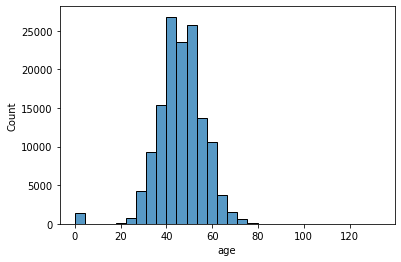

In [13]:
sns.histplot(
    x = runners.age,
    bins = 30
)

In [14]:
baby_runners = runners[runners.age < 18]
baby_runners

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds
54,72496,30.0,GARAU Pere,25H 39M 18S,0,M,ESP,92358.0
88,72496,63.0,OLIVAR Julien,28H 9M 39S,0,M,FRA,101379.0
100,72496,75.0,CABALLE Francesc,28H 44M 3S,0,M,ESP,103443.0
107,72496,82.0,IGLESIAS Jose,29H 0M 17S,0,M,ESP,104417.0
112,72496,87.0,FRAILE Uxue,29H 14M 2S,0,W,ESP,105242.0
...,...,...,...,...,...,...,...,...
137481,2320,97.0,EBREY Reuben,26H 58M 0S,0,M,NZL,97080.0
137489,2320,105.0,BURROWS Steven,27H 18M 20S,0,M,GBR,98300.0
137491,2320,107.0,N.N,27H 20M 43S,0,M,SWE,98443.0
137494,2320,110.0,NOTT Tony,28H 9M 10S,0,M,GBR,101350.0


In [15]:
baby_runners_occ = baby_runners['runner'].value_counts().fillna(0).astype(int)
print(baby_runners_occ)
test = runners[runners.runner == "NEWTON Matt"]
test

LOTT Brandon              8
NEWTON Matt               4
HARRASSER Sean            4
LAGARENNE Alexandre       4
N.N                       4
                         ..
ORTELLADO Mart            1
NARDI BORBA L             1
PARANHOS COELHO Monica    1
ARIAS Victor              1
MCCLELLAND James          1
Name: runner, Length: 1261, dtype: int64


,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds
38506,36539,51.0,NEWTON Matt,26H 20M 31S,48,M,USA,94831.0
54219,36963,100.0,NEWTON Matt,31H 1M 36S,48,M,USA,111696.0
62045,26593,35.0,NEWTON Matt,27H 27M 1S,0,M,USA,98821.0
65296,16729,159.0,NEWTON Matt,25H 34M 35S,0,M,USA,92075.0
70284,12239,45.0,NEWTON Matt,26H 54M 38S,48,M,USA,96878.0
79975,16065,15.0,NEWTON Matt,24H 21M 6S,48,M,USA,87666.0
85546,14133,89.0,NEWTON Matt,31H 56M 31S,48,M,USA,114991.0
93098,11275,18.0,NEWTON Matt,28H 50M 47S,48,M,USA,103847.0
100549,10854,71.0,NEWTON Matt,29H 39M 9S,48,M,USA,106749.0
117682,7115,36.0,NEWTON Matt,30H 28M 0S,0,M,USA,109680.0


In [16]:
race[race.race_year_id == 3259]

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
1160,3259,CASCADE CREST 100 MILE ENDURANCE RUN,CASCADE CREST 100 MILE ENDURANCE RUN,NaN,United States,2012-08-25,00:00:00,solo,161.0,6700,-6700,0,0,96


**Observation:** Quand l'age est à 0, il est possible de le retrouver si le coureur a couru d'autres courses en mentionnant son nom. (A priori ce n'est pas faisable pour tout le monde).<br>
**Problème:** On remarque que l'age indiqué n'est pas l'age au moment de la course, mais l'age à une année fixe données, peut-être 2021 par exemple. Nécessité de recalculer les ages au moment de la course...

# Quel age est représenté ?

In [17]:
runners_occ = runners['runner'].value_counts().fillna(0).astype(int)
print(runners_occ)
test = runners[runners.runner == "FU Chihping"]
test

SMITH Mike                    62
DONNELLY Susan                47
FANCETT Kenneth               42
FU Chihping                   39
CARTER Williams               39
                              ..
MAZZOCCHI LACONDEGUY Paola     1
ROVIRA FERRER Maria            1
BRENES SOLSONA Gilbert         1
DIAZ MAYOR David               1
SCHOLZ Monica                  1
Name: runner, Length: 73629, dtype: int64


,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds
10416,59437,NaN,FU Chihping,NaN,55,M,USA,NaN
12669,59557,207.0,FU Chihping,36H 3M 43S,55,M,USA,129823.0
12916,67160,NaN,FU Chihping,NaN,55,M,USA,NaN
15991,49059,NaN,FU Chihping,NaN,55,M,USA,NaN
24586,38949,NaN,FU Chihping,NaN,55,M,USA,NaN
25141,42289,79.0,FU Chihping,47H 59M 57S,55,M,USA,172797.0
28852,39881,NaN,FU Chihping,NaN,55,M,USA,NaN
30759,41443,NaN,FU Chihping,NaN,55,M,USA,NaN
35325,41919,NaN,FU Chihping,NaN,55,M,USA,NaN
35688,41131,37.0,FU Chihping,36H 15M 53S,55,M,USA,130553.0


In [18]:
race[race.race_year_id == 16729]

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
579,16729,Javelina Jundred,100 Miles,FortMcDowell,United States,2017-10-28,06:00:00,solo,159.4,1760,-1760,26,799,535


**Gros problème:** Les coureurs ne sont pas identifiés par un identifiant unique...
Recalculer un identifiant unique pour chacun des coureurs

In [19]:
old = runners[runners.age == 133]
old

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds
37633,35721,218.0,KONDIC Stefan,40H 56M 21S,133,M,SRB,147381.0
43831,30573,48.0,KONDIC Stefan,43H 15M 10S,133,M,SRB,155710.0
79500,13476,244.0,KONDIC Stefan,45H 48M 3S,133,M,SRB,164883.0


In [20]:
race[race.race_year_id == 13476]

,race_year_id,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,frequency
688,13476,100 Miles Of Istria,100 Miles,Umag,Croatia,2017-04-07,16:00:00,Solo,170.4,7100,-7390,12,0,321


**Après des recherches sur une partie des participants, l'age des participants est l'age qu'ils avaient en 2021 !
Il faudrait donc ajouter une colonne dans ranking.csv pour traiter leur age au moment de la course.**

In [21]:
runners = runners.assign(
    runner_id = runners.runner.str.replace(' ', '') + runners.nationality.str[:] + runners.gender.str[:] + runners.age.astype(str).str[:]
)
runners

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds,runner_id
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,VERHEULJasperGBRM30
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,MOULDINGJONGBRM43
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,RICHARDSONPhillGBRM38
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,DYSONFionaGBRW55
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,FRONTERASKarenGBRW48
...,...,...,...,...,...,...,...,...,...
137798,3253,42.0,MARR Gary,35H 29M 0S,70,M,USA,127740.0,MARRGaryUSAM70
137799,3253,43.0,SCHOLZ Monica,35H 37M 0S,54,W,CAN,128220.0,SCHOLZMonicaCANW54
137800,3253,44.0,GRYFE Robert,35H 46M 0S,55,M,CAN,128760.0,GRYFERobertCANM55
137801,3253,45.0,ESCOBAR Luis James,35H 48M 0S,58,M,USA,128880.0,ESCOBARLuisJamesUSAM58


In [22]:
runners_occ = runners['runner_id'].value_counts().fillna(0).astype(int)
df = pd.DataFrame(runners_occ).reset_index()
df

,index,runner_id
0,DONNELLYSusanUSAW58,43
1,FANCETTKennethGBRM72,41
2,SMITHMikeUSAM64,40
3,CARTERWilliamsUSAM63,39
4,FUChihpingUSAM55,39
...,...,...
76520,EICHBICHLERThomasITAM32,1
76521,BENBOUZIDAmineMARM39,1
76522,ROSSIAndreaITAM42,1
76523,IANETTGabrieleITAM47,1


<AxesSubplot:xlabel='runner_id'>

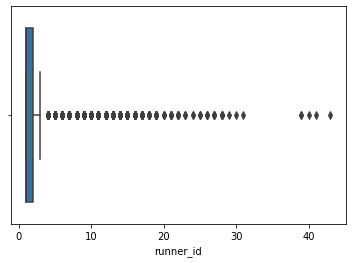

In [23]:
sns.boxplot(
    x = df.runner_id,
)

In [24]:
runners

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds,runner_id
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,VERHEULJasperGBRM30
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,MOULDINGJONGBRM43
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,RICHARDSONPhillGBRM38
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,DYSONFionaGBRW55
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,FRONTERASKarenGBRW48
...,...,...,...,...,...,...,...,...,...
137798,3253,42.0,MARR Gary,35H 29M 0S,70,M,USA,127740.0,MARRGaryUSAM70
137799,3253,43.0,SCHOLZ Monica,35H 37M 0S,54,W,CAN,128220.0,SCHOLZMonicaCANW54
137800,3253,44.0,GRYFE Robert,35H 46M 0S,55,M,CAN,128760.0,GRYFERobertCANM55
137801,3253,45.0,ESCOBAR Luis James,35H 48M 0S,58,M,USA,128880.0,ESCOBARLuisJamesUSAM58


<AxesSubplot:>

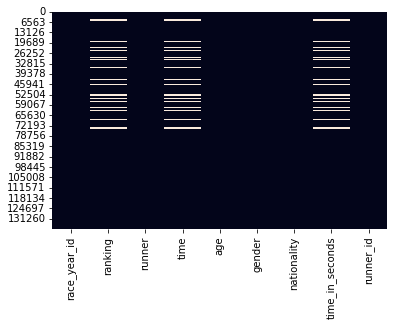

In [25]:
sns.heatmap(runners.isnull(), cbar = False)